<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/Clustering/KMeans/mall_customers_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

## Data preprocessing

### Importing the libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [68]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Taking only two features from the dataset

Just to make a 2D plot later (we need at most 2 features to do it)

In [69]:
X = dataset.iloc[:, -2:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [70]:
X = X.values
dataset = dataset.iloc[:, 1:].values

### Using the elbow method to find the optimal number of clusters

WCSS - Within Cluster Sum of Squares

#### Elbow method for 2 features in a dataset

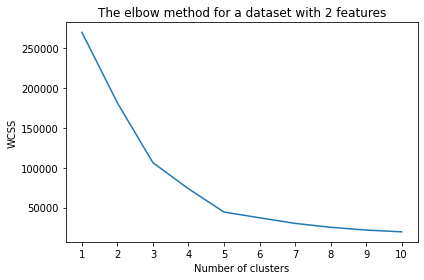

In [71]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The elbow method for a dataset with 2 features")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

Five seems to be the optimal number of clusters for 2 features

## Training

### Training the K-Means model using the optimal number of clusters

In [72]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = k_means.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Data visualisation

### Visualising the clusters

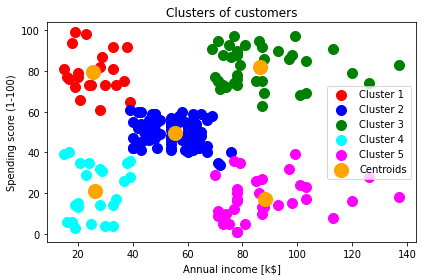

In [73]:
indices_of_cluster_0 = y_kmeans == 0
indices_of_cluster_1 = y_kmeans == 1
indices_of_cluster_2 = y_kmeans == 2
indices_of_cluster_3 = y_kmeans == 3
indices_of_cluster_4 = y_kmeans == 4

plt.scatter(x=X[indices_of_cluster_0, 0], y=X[indices_of_cluster_0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x=X[indices_of_cluster_1, 0], y=X[indices_of_cluster_1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x=X[indices_of_cluster_2, 0], y=X[indices_of_cluster_2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x=X[indices_of_cluster_3, 0], y=X[indices_of_cluster_3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x=X[indices_of_cluster_4, 0], y=X[indices_of_cluster_4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(x=k_means.cluster_centers_[:, 0], y=k_means.cluster_centers_[:, 1], s=200, c='orange', label='Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual income [k$]")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.tight_layout()
plt.show()